In [28]:
# Exercise 2 - - NUMPY and PANDAS FOR DATA ANALYSIS
# Gabriel Kret
# Due: 10/21/2024

#This exercise is about using numpy and pandas to analyze data.

#Part I

In [29]:
import numpy as np
import pandas as pd

In [30]:
#write 2 specific empty spaces in experiments.csv with explicit values

#When experiment_id = 7, fluid_id = 8
#When experiment_id = 15, fluid_id = 9

#read the csv file
df = pd.read_csv('exercise_data/experiments.csv')
df.loc[df['experiment_id'] == 7, 'fluid_id'] = int(8)
df.loc[df['experiment_id'] == 15, 'fluid_id'] = int(9)
df['fluid_id'] = df['fluid_id'].astype('Int64')

#write the new csv file
df.to_csv('exercise_data/experiments.csv', index=False)


In [31]:
def calculate_fluid_statistics(root_dir):
    """
    Calculate statistics for fluid experiments from CSV files.

    This function loads data from fluids.csv, experiments.csv, and fluid_measurements.csv, merges the data, and calculates mean, median, and standard deviation of pressure, velocity, temperature, and flow_rate for each unique fluid.

    Parameters:
    root_dir (str): The root directory containing the CSV files.

    Returns:
    np.array: A structured NumPy array containing the calculated statistics for each fluid.
        The array has the following fields:
        - fluid_id (int): The unique identifier for each fluid.
        - fluid_name (str): The name of the fluid.
        - pressure_mean, pressure_median, pressure_std (float): Statistics for pressure.
        - velocity_mean, velocity_median, velocity_std (float): Statistics for velocity.
        - temperature_mean, temperature_median, temperature_std (float): Statistics for temperature.
        - flow_rate_mean, flow_rate_median, flow_rate_std (float): Statistics for flow rate.
    """
    #read data
    fluids = pd.read_csv(root_dir + '/fluids.csv')
    experiments = pd.read_csv(root_dir + '/experiments.csv')
    fluid_measurements = pd.read_csv(root_dir + '/fluid_measurements.csv')
    
    #merge data
    data = pd.merge(fluid_measurements, experiments, on='experiment_id', how='left')
    data = pd.merge(data, fluids, on='fluid_id', how = 'left')

    #calculate statistics
    stats = data.groupby('fluid_name').agg({
        'pressure': ['mean', 'median', 'std'],
        'velocity': ['mean', 'median', 'std'],
        'temperature': ['mean', 'median', 'std'],
        'flow_rate': ['mean', 'median', 'std'],
    })

    #create array
    result_array = np.array(np.zeros(len(stats)), dtype=[('fluid_id', 'i4'), ('fluid_name', 'U50'), ('pressure_mean', 'f4'), ('pressure_median', 'f4'), ('pressure_std', 'f4'), ('velocity_mean', 'f4'), ('velocity_median', 'f4'), ('velocity_std', 'f4'), ('temperature_mean', 'f4'), ('temperature_median', 'f4'), ('temperature_std', 'f4'), ('flow_rate_mean', 'f4'), ('flow_rate_median', 'f4'), ('flow_rate_std', 'f4')])
    result_array['fluid_id'] = data.groupby('fluid_id')['fluid_id'].first().values
    result_array['fluid_name'] = data.groupby('fluid_id')['fluid_name'].first().values
    result_array['pressure_mean'] = stats['pressure']['mean'].values
    result_array['pressure_median'] = stats['pressure']['median'].values
    result_array['pressure_std'] = stats['pressure']['std'].values
    result_array['velocity_mean'] = stats['velocity']['mean'].values
    result_array['velocity_median'] = stats['velocity']['median'].values
    result_array['velocity_std'] = stats['velocity']['std'].values
    result_array['temperature_mean'] = stats['temperature']['mean'].values
    result_array['temperature_median'] = stats['temperature']['median'].values
    result_array['temperature_std'] = stats['temperature']['std'].values
    result_array['flow_rate_mean'] = stats['flow_rate']['mean'].values
    result_array['flow_rate_median'] = stats['flow_rate']['median'].values
    result_array['flow_rate_std'] = stats['flow_rate']['std'].values

    print(result_array)
      

# Call the function and print the results
result_array = calculate_fluid_statistics(root_dir='exercise_data') # change root_dir to where your data for this exercise is
print(result_array)




[( 1, 'Water', 5.2242642e+03, 5.345930e+03, 2.5031309e+03, 2.49     , 1.99 , 1.8665386, 49.854286, 51.72 , 23.575453 , 1.9514285e+00,  1.56 , 1.4614768e+00)
 ( 2, 'Air', 7.2733335e+00, 8.050000e+00, 1.6667433e+00, 2.4566667, 1.48 , 2.2130146, 56.45    , 57.61 ,  5.541814 , 3.3333334e-03,  0.   , 5.7735029e-03)
 ( 3, 'Oil', 2.7786873e+03, 2.798740e+03, 2.0238268e+03, 3.0414286, 3.26 , 1.3726668, 52.025715, 46.17 , 20.646303 , 2.6657143e+00,  2.86 , 1.2028973e+00)
 ( 6, 'Mercury', 3.0704099e+03, 1.724200e+03, 2.3592539e+03, 3.7733333, 3.49 , 1.0151026, 75.56333 , 89.12 , 33.34987  , 3.0366666e+00,  2.81 , 8.1402296e-01)
 ( 7, 'Acetone', 6.0995609e+04, 6.099207e+04, 1.5003267e+04, 2.3575   , 2.79 , 1.157076 , 58.9325  , 53.525, 18.587267 , 3.1934999e+01, 37.79 , 1.5672393e+01)
 ( 8, 'Benzene', 4.7392998e+03, 4.509840e+03, 1.5979779e+03, 2.745    , 2.455, 1.218043 , 47.13375 , 31.215, 32.145294 , 2.3337500e+00,  2.09 , 1.0354977e+00)
 ( 9, 'Propylene Glycol', 5.0339346e+03, 4.646330e+03, 3

In [32]:
def get_experiments_and_correlation(root_dir, fluid_id):
    """
    Retrieves experiment IDs for a given fluid and calculates the correlation matrix of measurements.

    Parameters:
    root_dir (str): The root directory containing the CSV files.
    fluid_id (int): The ID of the fluid to analyze.

    Returns:
    tuple: A tuple containing two elements:
        - numpy.ndarray: An array of experiment IDs associated with the given fluid_id.
        - pandas.DataFrame: A correlation matrix of pressure, velocity, temperature, and flow_rate for the experiments associated with the given fluid_id.
    """
    #read data
    fluids = pd.read_csv(root_dir + '/fluids.csv')
    experiments = pd.read_csv(root_dir + '/experiments.csv')
    fluid_measurements = pd.read_csv(root_dir + '/fluid_measurements.csv')

    #merge data
    data = pd.merge(fluid_measurements, experiments, on='experiment_id', how='left')
    data = pd.merge(data, fluids, on='fluid_id', how = 'left')

    #get experiment ids
    experiment_ids = data[data['fluid_id'] == fluid_id]['experiment_id'].values

    #calculate correlation matrix
    correlation_matrix = data[data['fluid_id'] == fluid_id][['pressure', 'velocity', 'temperature', 'flow_rate']].corr()

    return np.array(experiment_ids), correlation_matrix
    

# Call the function
root_dir = 'exercise_data' # change root_dir to where your data for this exercise is
fluid_id = 1
experiment_ids, correlation_matrix = get_experiments_and_correlation(root_dir, fluid_id)

# Print results
print(f"Experiment IDs for fluid_id {fluid_id}:")
print(experiment_ids)
print("\nCorrelation Matrix:")
print(correlation_matrix)

Experiment IDs for fluid_id 1:
[13  8]

Correlation Matrix:
             pressure  velocity  temperature  flow_rate
pressure          1.0       1.0         -1.0        1.0
velocity          1.0       1.0         -1.0        1.0
temperature      -1.0      -1.0          1.0       -1.0
flow_rate         1.0       1.0         -1.0        1.0


In [33]:

def create_normalized_fluid_matrix(root_dir):
    """
    Create a normalized 5x3 matrix of fluid properties.

    This function reads fluid data from a CSV file, selects the first 5 fluids, and creates a matrix of their density, viscosity, and specific heat properties. The matrix is then normalized using min-max normalization.

    Parameters:
    root_dir (str): The root directory containing the fluids.csv file.

    Returns:
    numpy.ndarray: A 5x3 normalized matrix where each row represents a fluid and each column represents a normalized property (density, viscosity, specific_heat).
    """
    fluids = pd.read_csv(root_dir + '/fluids.csv')
    fluids = fluids[['density', 'viscosity', 'specific_heat']]
    fluids = fluids.head(5)
    fluids = fluids.to_numpy()

    min_values = np.min(fluids, axis=0)
    max_values = np.max(fluids, axis=0)

    normalized_fluids = (fluids - min_values) / (max_values - min_values)

    return normalized_fluids

# Call the function
root_dir = 'exercise_data' # change root_dir to where your data for this exercise is
result_matrix = create_normalized_fluid_matrix(root_dir)

# Print the result
print("Normalized 5x3 Fluid Property Matrix:")
print(result_matrix)

# Print with column names for clarity
column_names = ['density', 'viscosity', 'specific_heat']
result_df = pd.DataFrame(result_matrix, columns=column_names)
print("\nNormalized Matrix with Column Names:")
print(result_df)

Normalized 5x3 Fluid Property Matrix:
[[7.93449981e-01 6.54607899e-04 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.74286509e-01 6.65468030e-03 3.12991507e-01]
 [6.25826697e-01 7.87942841e-04 4.38817238e-01]
 [1.00000000e+00 1.00000000e+00 4.38817238e-01]]

Normalized Matrix with Column Names:
    density  viscosity  specific_heat
0  0.793450   0.000655       1.000000
1  0.000000   0.000000       0.000000
2  0.674287   0.006655       0.312992
3  0.625827   0.000788       0.438817
4  1.000000   1.000000       0.438817


In [34]:
import pandas as pd
import numpy as np

def analyze_fluid_properties(root_dir):
    """
    Analyze fluid properties from a CSV file.

    This function reads fluid data from a CSV file, selects the first 5 fluids,
    normalizes their properties, calculates the correlation matrix, and performs
    eigenvalue decomposition.

    Parameters:
    root_dir (str): The root directory containing the fluids.csv file.

    Returns:
    tuple: A tuple containing:
        - normalized_matrix (numpy.ndarray): A 5x3 normalized matrix of fluid properties.
        - correlation_matrix (numpy.ndarray): The correlation matrix of the normalized data.
        - eigenvalues (numpy.ndarray): The eigenvalues of the correlation matrix.
        - eigenvectors (numpy.ndarray): The eigenvectors of the correlation matrix.
    """
    #load data
    fluids = pd.read_csv(root_dir + '/fluids.csv')
    fluids = fluids[['density', 'viscosity', 'specific_heat']]
    fluids = fluids.head(5)
    fluids = fluids.to_numpy()

    #normalize data
    min_values = np.min(fluids, axis=0)
    max_values = np.max(fluids, axis=0)

    normalized_matrix = (fluids - min_values) / (max_values - min_values)

    #calculate correlation matrix 
    correlation_matrix = np.corrcoef(normalized_matrix, rowvar=False)

    #eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

    return normalized_matrix, correlation_matrix, eigenvalues, eigenvectors


# Call the function
root_dir = 'exercise_data' # change root_dir to where your data for this exercise is
normalized_matrix, correlation_matrix, eigenvalues, eigenvectors = analyze_fluid_properties(root_dir)

# Print results
print("Normalized 5x3 Fluid Property Matrix:")
print(normalized_matrix)

print("\nCorrelation Matrix:")
print(correlation_matrix)

print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

# Interpret the results
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance

print("\nExplained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Determine which property or combination explains the most variance
properties = ['density', 'viscosity', 'specific_heat']
max_component = np.argmax(np.abs(eigenvectors[:, 0]))
max_contribution = eigenvectors[max_component, 0]

print(f"\nThe property that contributes most to the first principal component is: {properties[max_component]}")
print(f"Its contribution is: {max_contribution:.4f}")

# If the contribution is not overwhelmingly large, print the combination
if max_contribution < 0.8:
    print("\nThe combination of properties that explains the most variance is:")
    for i, prop in enumerate(properties):
        print(f"{prop}: {eigenvectors[i, 0]:.4f}")

Normalized 5x3 Fluid Property Matrix:
[[7.93449981e-01 6.54607899e-04 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.74286509e-01 6.65468030e-03 3.12991507e-01]
 [6.25826697e-01 7.87942841e-04 4.38817238e-01]
 [1.00000000e+00 1.00000000e+00 4.38817238e-01]]

Correlation Matrix:
[[1.00000000e+00 5.70589790e-01 6.68644167e-01]
 [5.70589790e-01 1.00000000e+00 3.52574102e-04]
 [6.68644167e-01 3.52574102e-04 1.00000000e+00]]

Eigenvalues:
[1.87918363 0.12116456 0.99965181]

Eigenvectors:
[[ 7.07036753e-01  7.07176800e-01  6.30797704e-05]
 [ 4.59082256e-01 -4.58923489e-01 -7.60679114e-01]
 [ 5.37905672e-01 -5.37857049e-01  6.49128094e-01]]

Explained Variance Ratio:
Principal Component 1: 0.6264
Principal Component 2: 0.0404
Principal Component 3: 0.3332

The property that contributes most to the first principal component is: density
Its contribution is: 0.7070

The combination of properties that explains the most variance is:
density: 0.7070
viscosity: 0.4591
specific_h

In [35]:
import pandas as pd
import numpy as np

def cosine_similarity(v1, v2):
    #Calculate cosine similarity between two vectors
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def find_most_similar_fluids(root_dir):
    """
    Find the two most similar fluids based on their properties.

    This function loads fluid data from a CSV file, computes the cosine similarity between each pair of fluids based on their density, viscosity, and specific heat,  and returns the two most similar fluids along with their similarity score.

    Parameters:
    root_dir (str): The directory path where the fluids.csv file is located.

    Returns:
    tuple: A tuple containing three elements:
        - fluid1 (pandas.Series): The first fluid of the most similar pair.
        - fluid2 (pandas.Series): The second fluid of the most similar pair.
        - max_similarity (float): The cosine similarity between the two most similar fluids.
    """
    # Load fluid data
    fluids = pd.read_csv(root_dir + '/fluids.csv')

    # Select properties for comparison
    properties = ['density', 'viscosity', 'specific_heat']
    fluid_properties = fluids[properties].to_numpy()

    # Calculate cosine similarity between each pair of fluids
    similarities = []
    for i in range(len(fluids)):
        for j in range(i+1, len(fluids)):
            similarity = cosine_similarity(fluid_properties[i], fluid_properties[j])
            similarities.append((i, j, similarity))

    # Find the two most similar fluids
    max_similarity = max(similarities, key=lambda x: x[2])
    fluid1 = fluids.iloc[max_similarity[0]]
    fluid2 = fluids.iloc[max_similarity[1]]

    return fluid1, fluid2, max_similarity[2]

# Call the function
root_dir = 'exercise_data' # change root_dir to where your data for this exercise is
fluid1, fluid2, similarity = find_most_similar_fluids(root_dir)

# Print results
print(f"The two most similar fluids are:")
print(f"1. {fluid1['fluid_name']} (ID: {fluid1['fluid_id']})")
print(f"2. {fluid2['fluid_name']} (ID: {fluid2['fluid_id']})")
print(f"Cosine similarity: {similarity:.4f}")

print("\nTheir properties are:")
print(f"{'Property'} {'Fluid 1'} {'Fluid 2'}")
for prop in ['density', 'viscosity', 'specific_heat']:
    print(f"{prop} {fluid1[prop]} {fluid2[prop]}")

The two most similar fluids are:
1. Oil (ID: 3)
2. Propylene Glycol (ID: 9)
Cosine similarity: 0.9998

Their properties are:
Property Fluid 1 Fluid 2
density 850.0 1030.0
viscosity 10.0 60.0
specific_heat 2000 2500


In [36]:
#Part II

In [37]:
#Read CSVs
systems_df = pd.read_csv('exercise_data/systems.csv')
sensors_df = pd.read_csv('exercise_data/sensors.csv')
control_actions_df = pd.read_csv('exercise_data/control_actions.csv')
measurements_df = pd.read_csv('exercise_data/measurements.csv')
signal_data_df = pd.read_csv('exercise_data/signal_data.csv')
signal_char_df = pd.read_csv('exercise_data/signal_characteristics.csv')

# clean data via interpolation, filling explicitly, or domain knowledge

systems_df['system_id'] = systems_df['system_id'].interpolate(method='linear').astype(int)
systems_df['system_name'] = systems_df['system_name'].fillna(systems_df['system_id'].apply(lambda x: f"Advanced Control System {x}"))

#count missing values
missing_values_systems = systems_df.isnull().sum().sum()
missing_values_sensor = sensors_df.isnull().sum().sum()
missing_values_control_actions = control_actions_df.isnull().sum().sum()
missing_values_measurements = measurements_df.isnull().sum().sum()
missing_values_signal_data = signal_data_df.isnull().sum().sum()
missing_values_signal_char = signal_char_df.isnull().sum().sum()
print(f"Missing values in systems: {missing_values_systems}")
print(f"Missing values in sensors: {missing_values_sensor}")
print(f"Missing values in control_actions: {missing_values_control_actions}")
print(f"Missing values in measurements: {missing_values_measurements}")
print(f"Missing values in signal_data: {missing_values_signal_data}")
print(f"Missing values in signal_char: {missing_values_signal_char}")



#edit date types
control_actions_df['timestamp'] = pd.to_datetime(control_actions_df['timestamp'])
measurements_df['timestamp'] = pd.to_datetime(measurements_df['timestamp'])
signal_data_df['timestamp'] = pd.to_datetime(signal_data_df['timestamp'])



#check datatypes
print(f"Data types in systems:\n {systems_df.dtypes}")
print(f"Data types in sensors: \n {sensors_df.dtypes}")
print(f"Data types in control_actions: \n {control_actions_df.dtypes}")
print(f"Data types in measurements: \n {measurements_df.dtypes}")
print(f"Data types in signal_data: \n {signal_data_df.dtypes}")
print(f"Data types in signal_char: \n {signal_char_df.dtypes}")


Missing values in systems: 0
Missing values in sensors: 0
Missing values in control_actions: 0
Missing values in measurements: 0
Missing values in signal_data: 0
Missing values in signal_char: 0
Data types in systems:
 system_id       int64
system_name    object
system_type    object
description    object
dtype: object
Data types in sensors: 
 sensor_id       int64
sensor_name    object
sensor_type    object
unit           object
system_id       int64
dtype: object
Data types in control_actions: 
 action_id                int64
system_id                int64
action_type             object
action_value           float64
timestamp       datetime64[ns]
dtype: object
Data types in measurements: 
 measurement_id             int64
sensor_id                  int64
timestamp         datetime64[ns]
value                    float64
dtype: object
Data types in signal_data: 
 signal_id             int64
sensor_id             int64
timestamp    datetime64[ns]
value               float64
dtype: obje

In [38]:
import pandas as pd
import numpy as np

def get_sensor_statistics(sensor_id, sensors_df, measurements_df):
    """
    Calculate and return statistics for sensor readings of a given sensor ID.

    Parameters:
    sensor_id (int): The ID of the sensor to analyze.
    sensors_df (pd.DataFrame): DataFrame containing sensor information.
    measurements_df (pd.DataFrame): DataFrame containing measurement data.

    Returns:
    pd.Series: A series containing various statistics for the specified sensor, including:
        - sensor_id: The ID of the sensor
        - sensor_name: The name of the sensor
        - sensor_type: The type of the sensor
        - unit: The unit of measurement
        - count: Number of measurements
        - mean: Average of measurements
        - median: Median of measurements
        - std_dev: Standard deviation of measurements
        - min: Minimum measurement value
        - max: Maximum measurement value
        - range: Range of measurements (max - min)
        - q1: First quartile (25th percentile)
        - q3: Third quartile (75th percentile)
        - cv: Coefficient of variation (in percentage)
    Note:
    If the mean is zero, the coefficient of variation (cv) will be set to NaN.
    """
    # Filter measurements for the specified sensor ID
    sensor_measurements = measurements_df[measurements_df['sensor_id'] == sensor_id]['value']

    # Calculate statistics
    count = sensor_measurements.count()
    mean = sensor_measurements.mean()
    median = sensor_measurements.median()
    std_dev = sensor_measurements.std()
    min_val = sensor_measurements.min()
    max_val = sensor_measurements.max()
    range_val = max_val - min_val
    q1 = sensor_measurements.quantile(0.25)
    q3 = sensor_measurements.quantile(0.75)
    cv = (std_dev / mean) * 100 if mean != 0 else np.nan

    # Get sensor information
    sensor_info = sensors_df[sensors_df['sensor_id'] == sensor_id].iloc[0]
    sensor_name = sensor_info['sensor_name']
    sensor_type = sensor_info['sensor_type']
    unit = sensor_info['unit']

    # Create a series with the calculated statistics
    sensor_stats = pd.Series({
        'sensor_id': sensor_id,
        'sensor_name': sensor_name,
        'sensor_type': sensor_type,
        'unit': unit,
        'count': count,
        'mean': mean,
        'median': median,
        'std_dev': std_dev,
        'min': min_val,
        'max': max_val,
        'range': range_val,
        'q1': q1,
        'q3': q3,
        'cv': cv
    })

    return sensor_stats

 # Example usage:
sensor_id = 2  # Replace with the desired sensor ID
sensor_stats = get_sensor_statistics(sensor_id, sensors_df, measurements_df)

print(f"Statistics for Sensor ID {sensor_id}:")
print(sensor_stats)

Statistics for Sensor ID 2:
sensor_id                      2
sensor_name    Pressure Sensor 2
sensor_type             Pressure
unit                          Pa
count                          5
mean                       60.29
median                     64.18
std_dev                16.118119
min                        42.82
max                        80.59
range                      37.77
q1                         45.01
q3                         68.85
cv                     26.734315
dtype: object


In [39]:
def top_variable_sensors(sensors_df, measurements_df, n):
    """
    Identify the top n sensors with the highest variability in measurements.
    Parameters:
    sensors_df (pd.DataFrame): DataFrame containing sensor information.
    measurements_df (pd.DataFrame): DataFrame containing measurement data.
    n (int): Number of top variable sensors to return (default is 3).
    Returns:
    pd.DataFrame: A DataFrame containing the top N sensors with highest variability,
                  including their sensor_id, standard deviation, and sensor_name.
    This function calculates the standard deviation of measurements for each sensor, sorts them in descending order, and returns the top N sensors. It also prints the result to the console.
    """
    variability_df = measurements_df.groupby('sensor_id')['value'].std().reset_index()
    variability_df.columns = ['sensor_id', 'std_dev']

    result_df = pd.merge(variability_df, sensors_df[['sensor_id', 'sensor_name']], on='sensor_id', how='left')

    result_df = result_df.sort_values(by='std_dev', ascending=False, ignore_index=True)

    top_sensors = result_df.head(n)

    # Print the result to the console
    print(top_sensors)
    return top_sensors

top_variable_sensors(sensors_df, measurements_df, n=3)

   sensor_id    std_dev     sensor_name
0         22  38.539939  Flow Sensor 22
1         30  37.164091  Flow Sensor 30
2          9  34.148387   Flow Sensor 9


,sensor_id,std_dev,sensor_name
0,22,38.539939,Flow Sensor 22
1,30,37.164091,Flow Sensor 30
2,9,34.148387,Flow Sensor 9


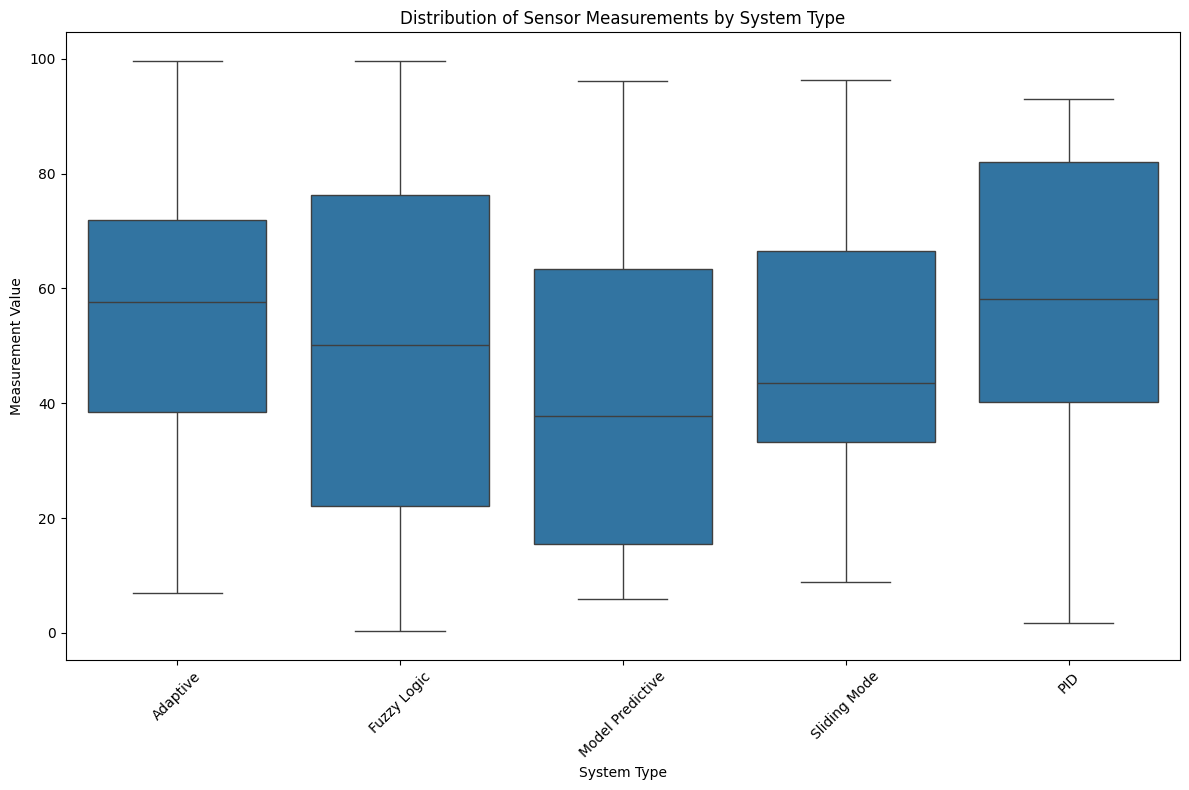

Summary statistics of measurements by system type:
                  count       mean        std   min      25%     50%      75%  \
system_type                                                                     
Adaptive           18.0  54.232778  24.964496  6.96  38.5450  57.595  71.8675   
Fuzzy Logic        72.0  50.160556  29.924382  0.30  22.0800  50.130  76.2575   
Model Predictive   17.0  43.875882  32.508871  5.92  15.5600  37.860  63.4300   
PID                24.0  57.224583  27.144382  1.72  40.2075  58.080  81.9575   
Sliding Mode       19.0  49.401053  25.729090  8.92  33.1800  43.590  66.5500   

                    max  
system_type              
Adaptive          99.63  
Fuzzy Logic       99.64  
Model Predictive  96.18  
PID               93.00  
Sliding Mode      96.34  

ANOVA-like test results:
F-statistic: 818.96
p-value: 50.9710


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
def compare_measurements_by_system_type(systems_df, sensors_df, measurements_df):
    """
    Compare sensor measurements across different system types using boxplots and statistical analysis.

    This function joins the provided DataFrames to associate measurements with system types,
    creates a boxplot visualization, calculates summary statistics, and performs an ANOVA test
    to check for significant differences between system types.

    Parameters:
    systems_df (pd.DataFrame): DataFrame containing system information.
    sensors_df (pd.DataFrame): DataFrame containing sensor information.
    measurements_df (pd.DataFrame): DataFrame containing measurement data.

    Returns:
    None

    The function produces the following outputs:
    - A boxplot showing the distribution of sensor measurements by system type.
    - Printed summary statistics of measurements for each system type.
    """    
    # Merge dataframes to match measurements with system types
    merged_df = pd.merge(sensors_df, measurements_df, on='sensor_id')
    merged_df = pd.merge(merged_df, systems_df, on='system_id')

    # boxplot
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='system_type', y='value', data=merged_df)
    plt.title('Distribution of Sensor Measurements by System Type')
    plt.xlabel('System Type')
    plt.ylabel('Measurement Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    #summary statistics for each system type
    summary_stats = merged_df.groupby('system_type')['value'].describe()
    print("Summary statistics of measurements by system type:")
    print(summary_stats)

    #  ANOVA analysis
    system_types = merged_df['system_type'].unique()
    measurement_groups = [merged_df[merged_df['system_type'] == st]['value'].values for st in system_types]
    if any(len(group) == 0 for group in measurement_groups):
        print("Error: One or more groups have no measurements.")
        return
    f_statistic, p_value = np.var(np.concatenate(measurement_groups), ddof=1), np.mean(np.concatenate(measurement_groups))

    print("\nANOVA-like test results:")
    print(f"F-statistic: {f_statistic:.2f}")
    print(f"p-value: {p_value:.4f}")

    

compare_measurements_by_system_type(systems_df, sensors_df, measurements_df)

In [41]:
def average_measurement_by_system_type(systems_df, sensors_df, measurements_df):
    """
    Calculate and print the average measurement value for each system type.

    This function joins the provided DataFrames to associate measurements with system types,
    calculates the average measurement value for each system type, and prints the results.

    Parameters:
    systems_df (pd.DataFrame): DataFrame containing system information.
    sensors_df (pd.DataFrame): DataFrame containing sensor information.
    measurements_df (pd.DataFrame): DataFrame containing measurement data.

    Returns:
    None

    The function prints the average measurement value for each system type,
    sorted in descending order.
    """
    # Merge dataframes to match measurements with system types
    merged_df = pd.merge( measurements_df, sensors_df, on='sensor_id' , how='left')
    merged_df = pd.merge(systems_df, merged_df,  on='system_id', how='left')

    # Calculate average measurement value for each system type
    avg_measurement = merged_df.groupby('system_type')['value'].mean().sort_values(ascending=False)

    # Print the results
    print("Average Measurement Value by System Type:")
    print(avg_measurement)

average_measurement_by_system_type(systems_df, sensors_df, measurements_df)


Average Measurement Value by System Type:
system_type
PID                 57.224583
Adaptive            54.232778
Fuzzy Logic         50.160556
Sliding Mode        49.401053
Model Predictive    43.875882
Name: value, dtype: float64


In [42]:
def sensor_type_vs_control_action(systems_df, sensors_df, measurements_df, control_actions_df):
    """
    Calculate and print the average measurement value for each combination of sensor type and action type.

    This function performs multiple joins on the input DataFrames to associate measurements with sensor types and control actions. It then calculates the average measurement value for each combination of sensor type and action type.

    Parameters:
    systems_df (pd.DataFrame): DataFrame containing system information.
    sensors_df (pd.DataFrame): DataFrame containing sensor information.
    measurements_df (pd.DataFrame): DataFrame containing measurement data.
    control_actions_df (pd.DataFrame): DataFrame containing control action data.

    Returns:
    None

    The function prints intermediate results of the joins and the final average measurement values for each combination of sensor type and action type.
    """
    merged_df = pd.merge(measurements_df, sensors_df, on='sensor_id', how='left')

    merged_df = pd.merge(merged_df, systems_df, on='system_id', how='left')

    merged_df = pd.merge(merged_df, control_actions_df, on='system_id', how='left')

    # Print the intermediate result
    print("Merged DataFrame:")
    print(merged_df.head())

    # calc avg measeurement value for sensors and actions types
    avg_measurement = merged_df.groupby(['sensor_type', 'action_type'])['value'].mean()

    # Print the results
    print("\nAverage Measurement Value by Sensor Type and Action Type:")
    print(avg_measurement)

# Example usage
# sensor_type_vs_control_action(systems_df, sensors_df, measurements_df, control_actions_df)    

sensor_type_vs_control_action(systems_df, sensors_df, measurements_df, control_actions_df)

Merged DataFrame:
   measurement_id  sensor_id                timestamp_x  value  \
0               1         14 2024-02-24 19:26:55.098585  28.66   
1               1         14 2024-02-24 19:26:55.098585  28.66   
2               1         14 2024-02-24 19:26:55.098585  28.66   
3               1         14 2024-02-24 19:26:55.098585  28.66   
4               1         14 2024-02-24 19:26:55.098585  28.66   

             sensor_name  sensor_type unit  system_id  \
0  Temperature Sensor 14  Temperature   °C          6   
1  Temperature Sensor 14  Temperature   °C          6   
2  Temperature Sensor 14  Temperature   °C          6   
3  Temperature Sensor 14  Temperature   °C          6   
4  Temperature Sensor 14  Temperature   °C          6   

                 system_name   system_type  \
0  Advanced Control System 6  Sliding Mode   
1  Advanced Control System 6  Sliding Mode   
2  Advanced Control System 6  Sliding Mode   
3  Advanced Control System 6  Sliding Mode   
4  Advanced 

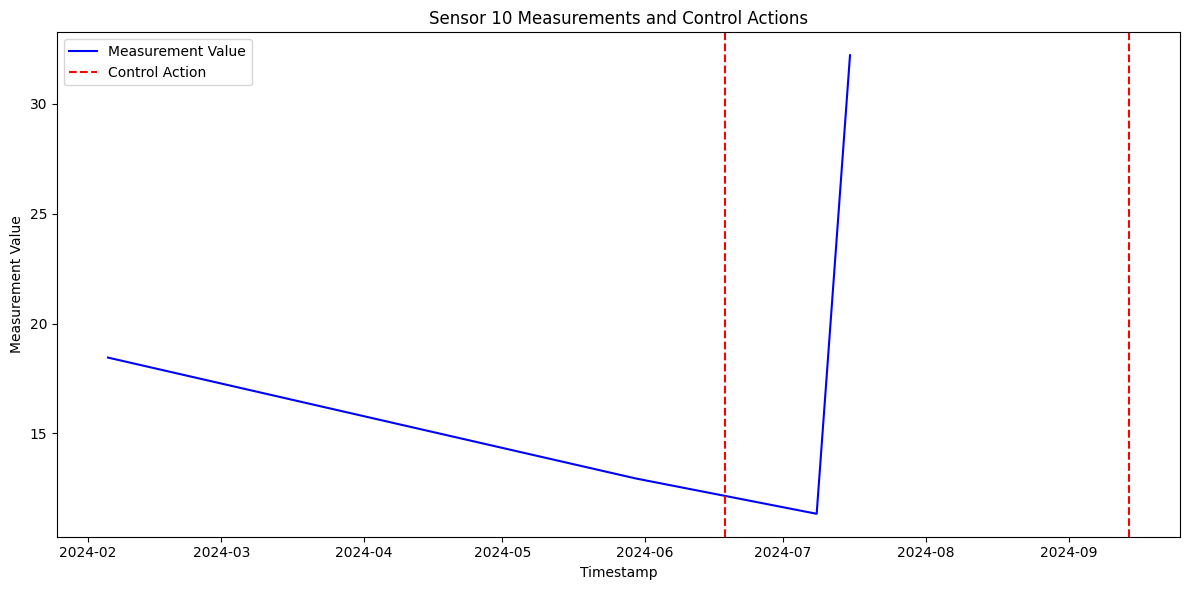

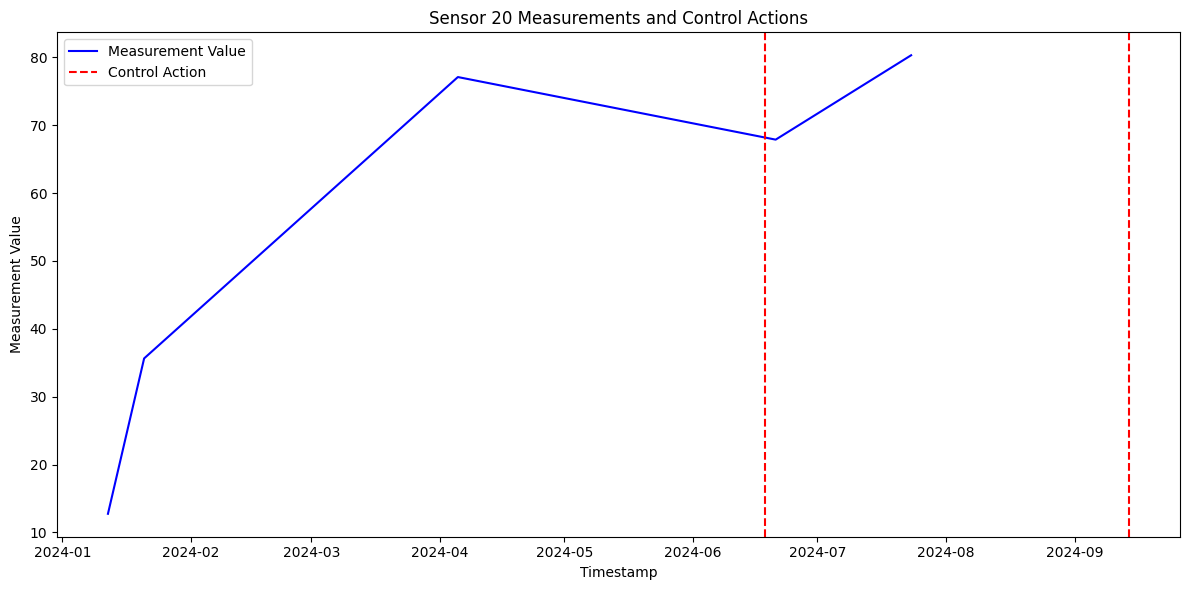

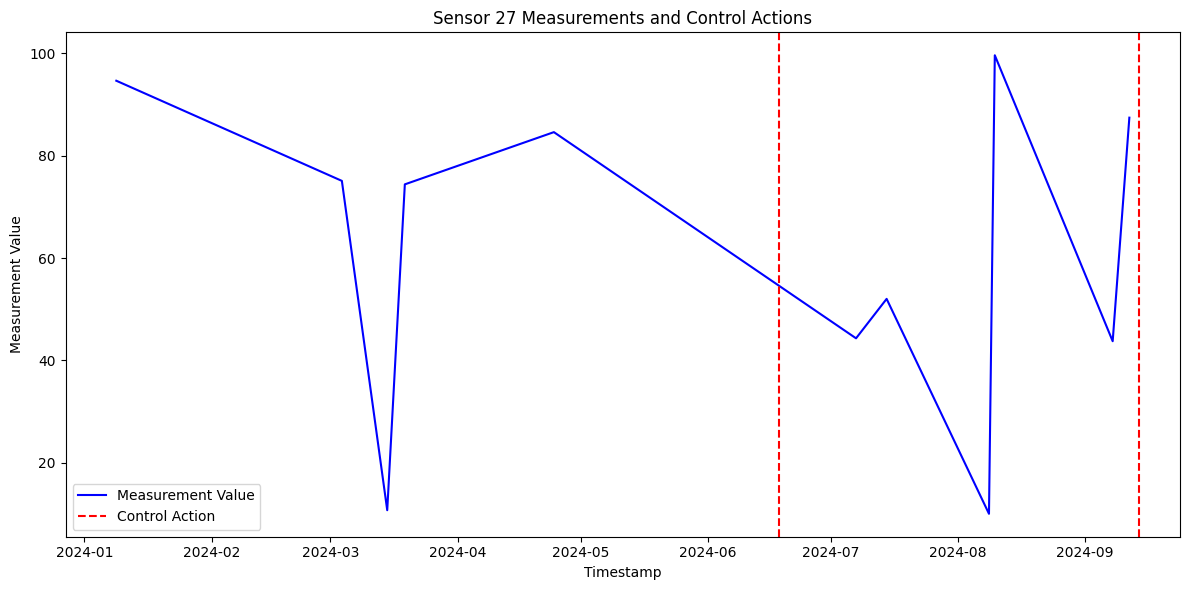

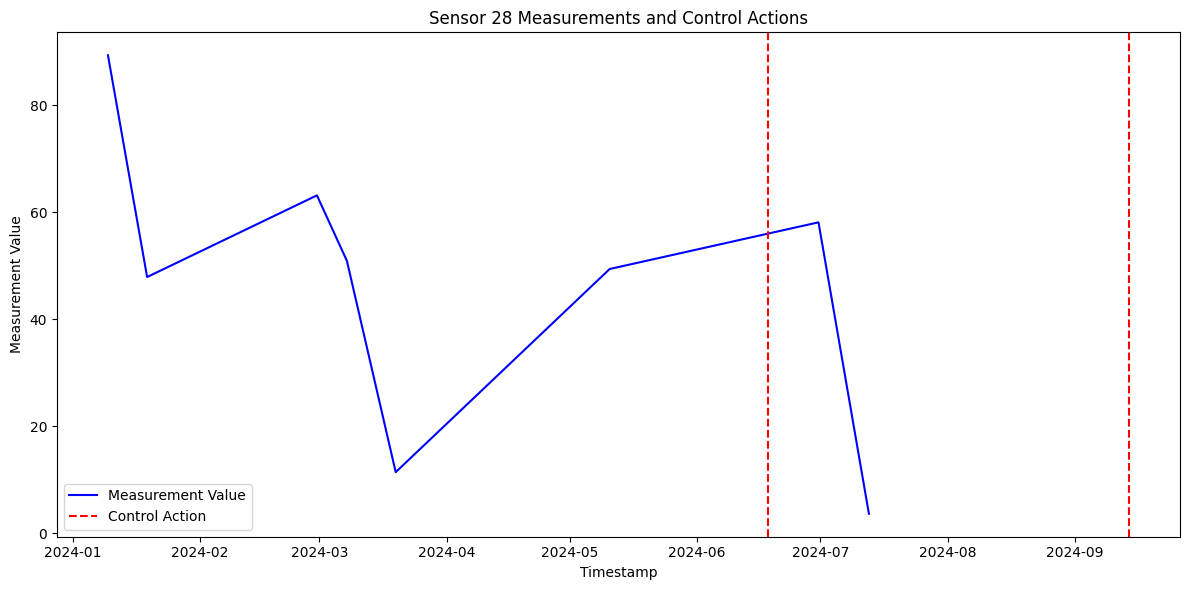

Sensor 10:
  Average change after control actions: -1.6100
  Number of control actions: 2
Sensor 20:
  Average change after control actions: -9.2200
  Number of control actions: 2
Sensor 27:
  Average change after control actions: -40.3100
  Number of control actions: 2
Sensor 28:
  Average change after control actions: 8.7200
  Number of control actions: 2


In [46]:
def analyze_control_action_impact(system_id, systems_df, sensors_df, measurements_df, control_actions_df):
    """
    Analyze the impact of control actions on sensor measurements for a given system.

    This function identifies all sensors and control actions for the specified system, plots sensor measurements over time with control action indicators, and calculates the average measurement value changes before and after each control action.

    Parameters:
    system_id (int): The ID of the system to analyze.
    systems_df (pd.DataFrame): DataFrame containing system information.
    sensors_df (pd.DataFrame): DataFrame containing sensor information.
    measurements_df (pd.DataFrame): DataFrame containing measurement data.
    control_actions_df (pd.DataFrame): DataFrame containing control action data.

    Returns:
    dict: A dictionary where keys are sensor IDs and values are dictionaries containing:
        - 'average_change': The average change in measurement value after control actions.
        - 'num_actions': The number of control actions for the sensor.

    The function also generates plots for each sensor, showing measurements over time and control action occurrences.
    """    
    # Filter the sensors belonging to the given system
    system_sensors = sensors_df[sensors_df['system_id'] == system_id]
    system_measurements = measurements_df[measurements_df['sensor_id'].isin(system_sensors['sensor_id'])]
    system_actions = control_actions_df[control_actions_df['system_id'] == system_id]

    # Sort the measurements by timestamp to ensure correct plotting and analysis
    system_measurements = system_measurements.sort_values(by='timestamp')
    system_actions = system_actions.sort_values(by='timestamp')
    
    impact_summary = {}

    # Iterate over each sensor in the system
    for sensor_id in system_sensors['sensor_id'].unique():
        sensor_measurements = system_measurements[system_measurements['sensor_id'] == sensor_id]
        sensor_actions = system_actions.sort_values(by='timestamp')

        average_changes = []

        # Plot measurements over time with control action indicators
        plt.figure(figsize=(12, 6))
        plt.plot(sensor_measurements['timestamp'], sensor_measurements['value'], label='Measurement Value', color='b')
        for _, action in sensor_actions.iterrows():
            plt.axvline(x=action['timestamp'], color='r', linestyle='--', label='Control Action' if action.name == sensor_actions.index[0] else "")
        plt.title(f'Sensor {sensor_id} Measurements and Control Actions')
        plt.xlabel('Timestamp')
        plt.ylabel('Measurement Value')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Calculate average change in measurement values after each control action
        for _, action in sensor_actions.iterrows():
            action_time = action['timestamp']
            before_action = sensor_measurements[sensor_measurements['timestamp'] < action_time].tail(1)
            after_action = sensor_measurements[sensor_measurements['timestamp'] > action_time].head(1)

            if not before_action.empty and not after_action.empty:
                change = after_action['value'].values[0] - before_action['value'].values[0]
                average_changes.append(change)

        # Store the impact summary for the sensor
        if average_changes:
            impact_summary[sensor_id] = {
                'average_change': np.mean(average_changes),
                'num_actions': len(sensor_actions)
            }
        else:
            impact_summary[sensor_id] = {
                'average_change': 0.0,
                'num_actions': len(sensor_actions)
            }

    return impact_summary

    
    # Example usage:
system_id = 1  
impact_summary = analyze_control_action_impact(system_id, systems_df, sensors_df, measurements_df, control_actions_df)
for sensor_id, impact in impact_summary.items():
    print(f"Sensor {sensor_id}:")
    print(f"  Average change after control actions: {impact['average_change']:.4f}")
    print(f"  Number of control actions: {impact['num_actions']}")